In [1]:
import numpy as np
import torch
import torch.nn as nn
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline
import torch.nn.functional as F
import pandas as pd
import seaborn as sns

In [2]:
def generate_data(N, dim=32, attention_col=1):
    x= np.random.standard_normal(size=(N, dim))
    y= np.random.randint(low=10, high=15, size=(N, 1))
    
    x[:, attention_col]=y[:, 0]
    return x, y

In [3]:
class Net(nn.Module):
    def __init__(self, ndim=32):
        super(Net, self).__init__()
        self.attention=nn.Linear(ndim, ndim)
        self.out=nn.Linear(ndim, 1)
        
    def atten(self, x):
        p=F.softmax(self.attention(x))
        return p
    
    def forward(self, x):
        x = x*self.atten(x)
        x = self.out(x)
        return x

In [4]:
model = Net(ndim=64)

In [5]:
X, y = generate_data(1000, dim=64, attention_col=0)
#print(X)
#print(y)

In [6]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_func = torch.nn.MSELoss()

In [7]:
for epoch in range(6000):
    pred = model(torch.FloatTensor(X))
    
    loss=loss_func(pred, torch.FloatTensor(y))
    optimizer.zero_grad()
    
    loss.backward()
    optimizer.step()
    
    if epoch%300==0:
        print(epoch, loss)

/Users/adityakumar/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:8: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


(0, tensor(144.1709))
(300, tensor(38.3219))
(600, tensor(8.5393))
(900, tensor(1.3664))
(1200, tensor(0.1367))
(1500, tensor(1.00000e-02 *
       1.0043))
(1800, tensor(1.00000e-03 *
       2.7816))
(2100, tensor(1.00000e-03 *
       2.5164))
(2400, tensor(1.00000e-03 *
       2.4474))
(2700, tensor(1.00000e-03 *
       2.3573))
(3000, tensor(1.00000e-03 *
       2.2184))
(3300, tensor(1.00000e-03 *
       2.0835))
(3600, tensor(1.00000e-03 *
       1.9192))
(3900, tensor(1.00000e-03 *
       1.7109))
(4200, tensor(1.00000e-03 *
       1.4847))
(4500, tensor(1.00000e-03 *
       1.2736))
(4800, tensor(1.00000e-03 *
       1.0692))
(5100, tensor(1.00000e-04 *
       8.7382))
(5400, tensor(1.00000e-04 *
       7.1130))
(5700, tensor(1.00000e-04 *
       5.8743))


In [8]:
o  =model(torch.FloatTensor(X))
print(o.shape)
a = model.atten(torch.FloatTensor(X))
print(a.shape)


torch.Size([1000, 1])
torch.Size([1000, 64])


/Users/adityakumar/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:8: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


In [9]:
k= a.data.numpy().mean(0)
print(k)

[9.92881775e-01 2.69904645e-04 6.61903323e-05 1.67670878e-05
 1.27309586e-05 5.18262204e-05 2.15336098e-04 3.45898734e-05
 3.43504595e-04 3.69943191e-05 4.08789929e-05 1.38788120e-04
 4.64019104e-05 4.50205007e-05 2.12557425e-05 1.07356384e-04
 3.75899835e-05 3.63383442e-05 1.20126504e-04 1.27928201e-04
 1.32804664e-04 1.50529842e-04 1.47901577e-04 3.04753310e-04
 1.81713385e-05 3.27092770e-04 3.37615522e-04 3.21957923e-05
 1.38147981e-04 1.40403545e-05 3.71685273e-05 5.24733514e-05
 1.32440091e-05 8.59433640e-05 2.92747372e-05 2.16300105e-05
 2.63664202e-04 2.99727253e-04 1.80748757e-04 6.80800877e-05
 8.90355514e-05 1.79210561e-04 1.35363196e-04 1.50642572e-05
 1.19330434e-04 2.91181233e-04 7.44892968e-05 1.05301609e-04
 1.99253540e-04 1.43480036e-04 2.73919941e-05 6.26738984e-05
 7.98665933e-05 2.10733197e-05 7.40720861e-05 1.29254433e-04
 3.42919302e-05 1.65683869e-05 9.95685114e-05 1.86305944e-04
 2.82655994e-04 1.42073972e-04 1.39620970e-04 4.61044074e-05]


In [ ]:
sns.barplot(x='attent')

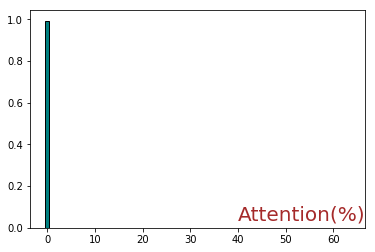

In [10]:

plt.bar(range(0, 64), height=k,color='teal', edgecolor='black',label='attention')
plt.text(40, 0.035, 'Attention(%)',fontdict={'size':20, 'color':'brown'})
plt.show()